In [31]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

In [32]:
path_auto_mpg=r"C:\Users\jator\OneDrive\ESSEX UNIVERSITY MASTERS DATA SCIENCE\module 4\Unit02 auto-mpg.csv"
auto_mpg=pd.read_csv(path_auto_mpg)
auto_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [33]:
auto_mpg.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [34]:
auto_mpg.info()
auto_mpg.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

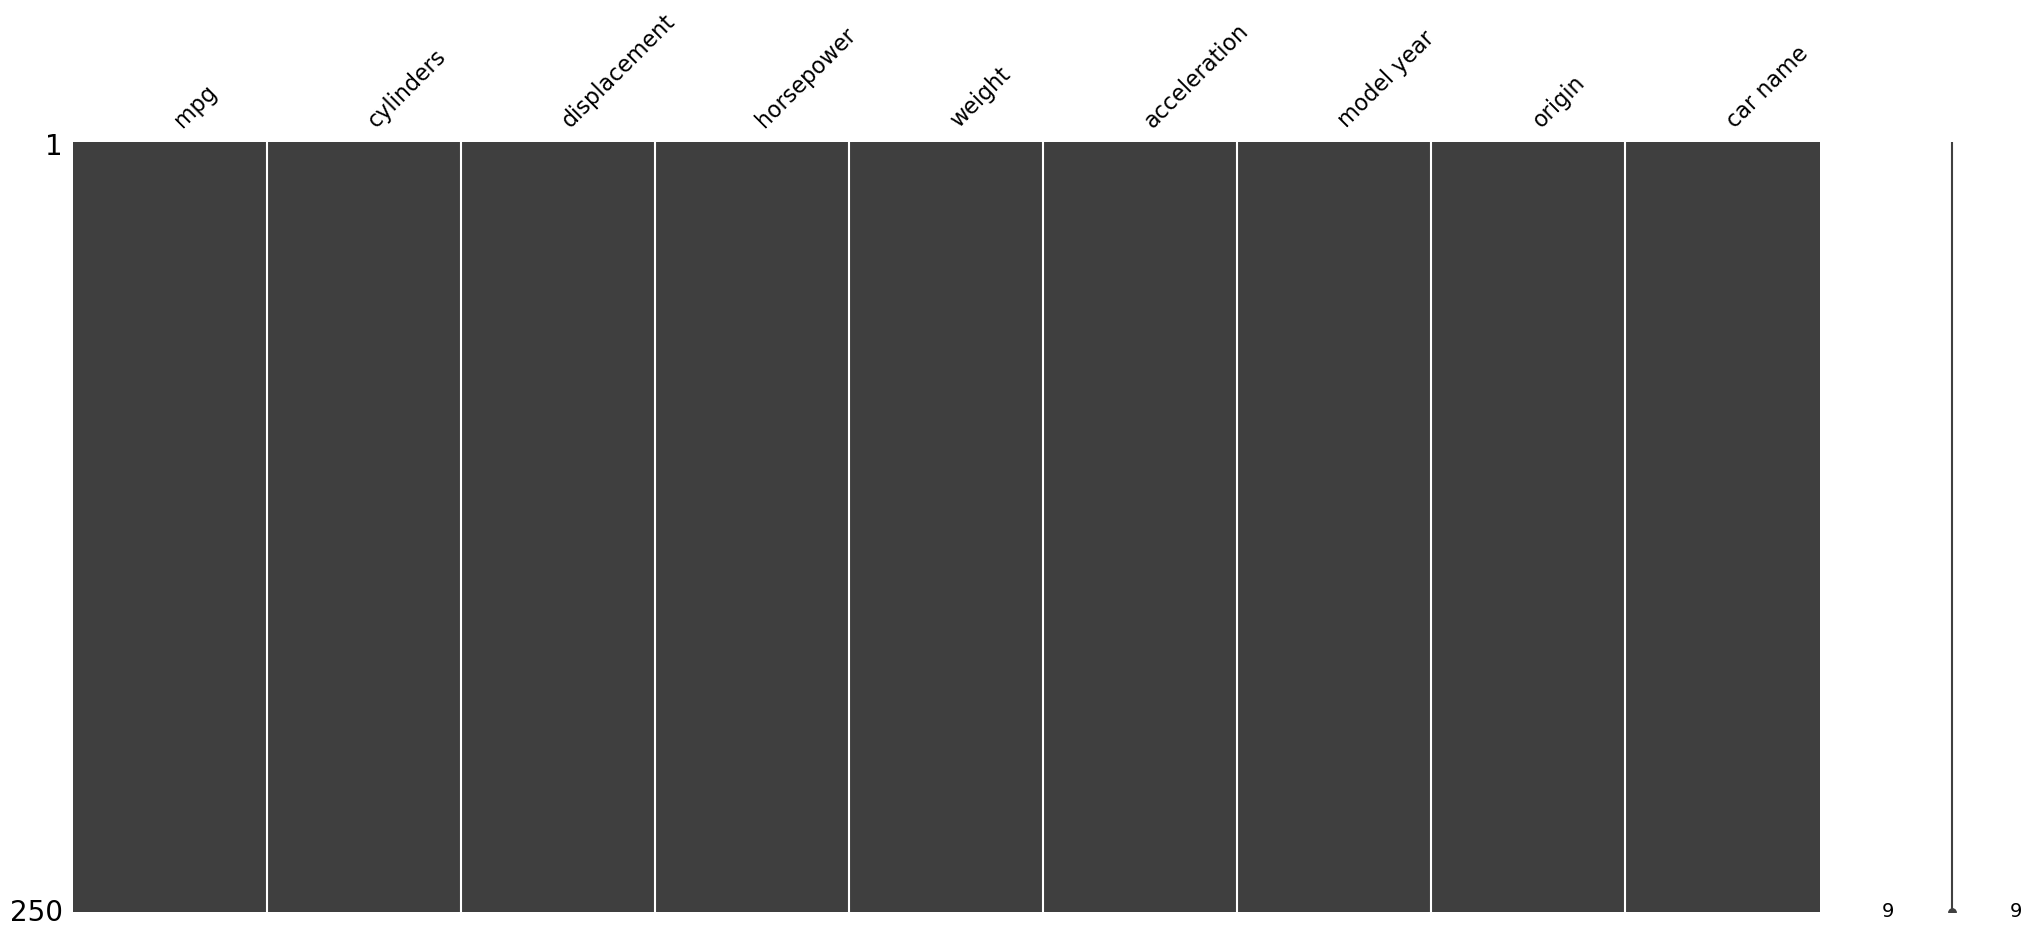

In [35]:
msno.matrix(auto_mpg.sample(250))
plt.show()  

In [36]:
total = numeric_features.isnull().sum().sort_values(ascending=False)
percent = (numeric_features.isnull().sum()/numeric_features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', '% of Total Observations'])
missing_data.index.name =' Numeric Feature'

missing_data.head(20)

,Total Missing Count,% of Total Observations
Numeric Feature,,
mpg,0,0.0
cylinders,0,0.0
displacement,0,0.0
weight,0,0.0
acceleration,0,0.0
model year,0,0.0
origin,0,0.0


In [37]:
numeric_features = auto_mpg.select_dtypes(include=[np.number])

numeric_features.columns

Index(['mpg', 'cylinders', 'displacement', 'weight', 'acceleration',
       'model year', 'origin'],
      dtype='object')

In [38]:
skewness = numeric_features.skew()
kurtosis = numeric_features.kurt()
skewness, kurtosis

(mpg             0.457066
 cylinders       0.526922
 displacement    0.719645
 weight          0.531063
 acceleration    0.278777
 model year      0.011535
 origin          0.923776
 dtype: float64,
 mpg            -0.510781
 cylinders      -1.376662
 displacement   -0.746597
 weight         -0.785529
 acceleration    0.419497
 model year     -1.181232
 origin         -0.817597
 dtype: float64)

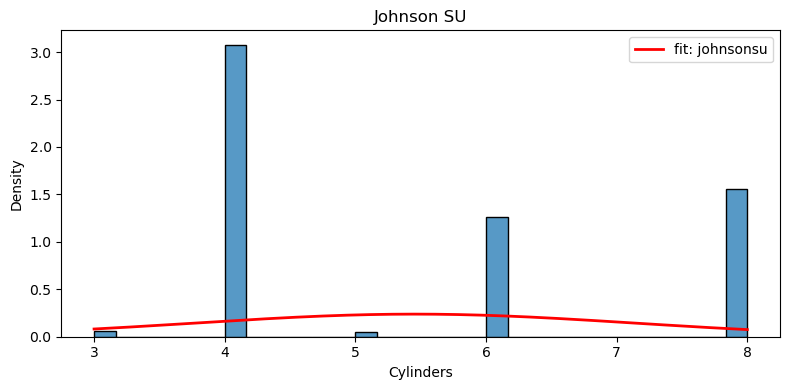

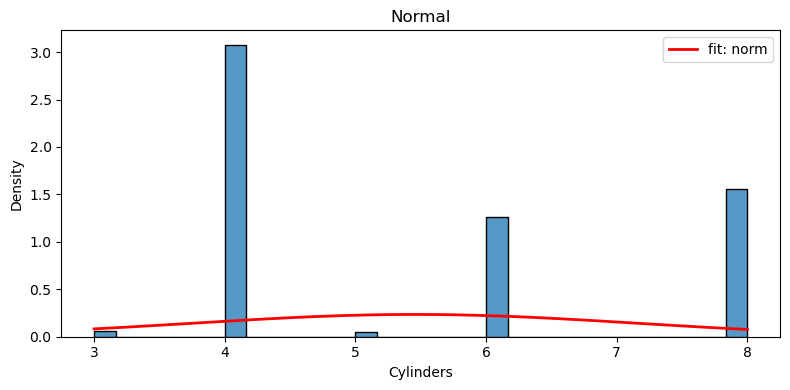

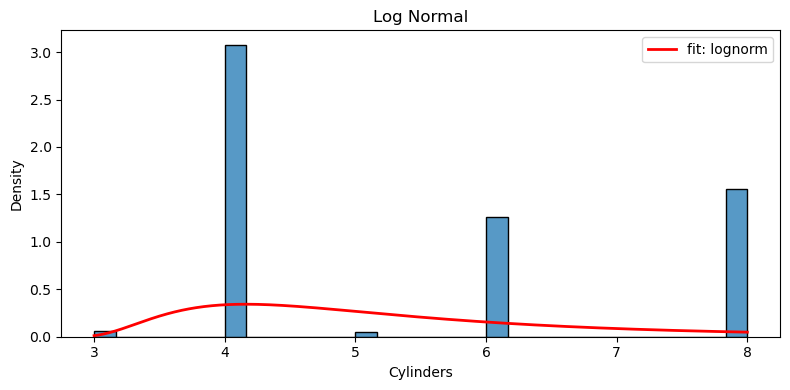

In [39]:
y = auto_mpg['cylinders'].values

dists = [
	('Johnson SU', st.johnsonsu),
	('Normal', st.norm),
	('Log Normal', st.lognorm)
]

for i, (name, dist) in enumerate(dists, start=1):
	plt.figure(i, figsize=(8, 4))
	plt.title(name)
	# plot histogram as density
	sns.histplot(y, kde=False, stat='density', bins=30, color='C0')
	# fit distribution to the data
	params = dist.fit(y)
	# create x for PDF
	x = np.linspace(y.min(), y.max(), 1000)
	pdf = dist.pdf(x, *params)
	# plot fitted PDF
	plt.plot(x, pdf, 'r-', lw=2, label=f'fit: {dist.name}')
	plt.legend()
	plt.xlabel('Cylinders')
	plt.ylabel('Density')
	plt.tight_layout()
	plt.show()

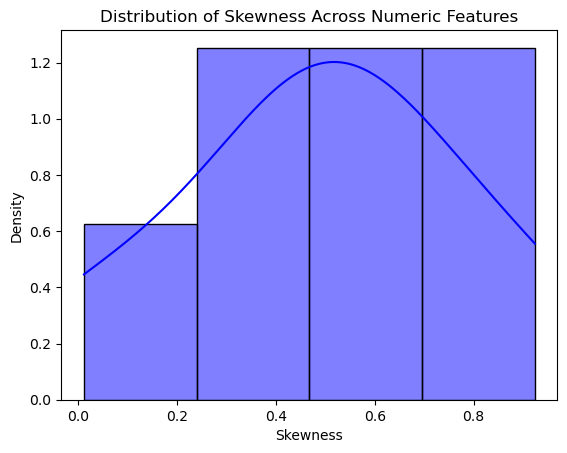

In [40]:
# compute skewness only for numeric columns and drop any NaNs,
# then plot the distribution of those skewness values.
numeric_skew = auto_mpg.select_dtypes(include=[np.number]).skew().dropna()
sns.histplot(numeric_skew, color='blue', kde=True, stat='density')
plt.xlabel('Skewness')
plt.title('Distribution of Skewness Across Numeric Features')
plt.show()

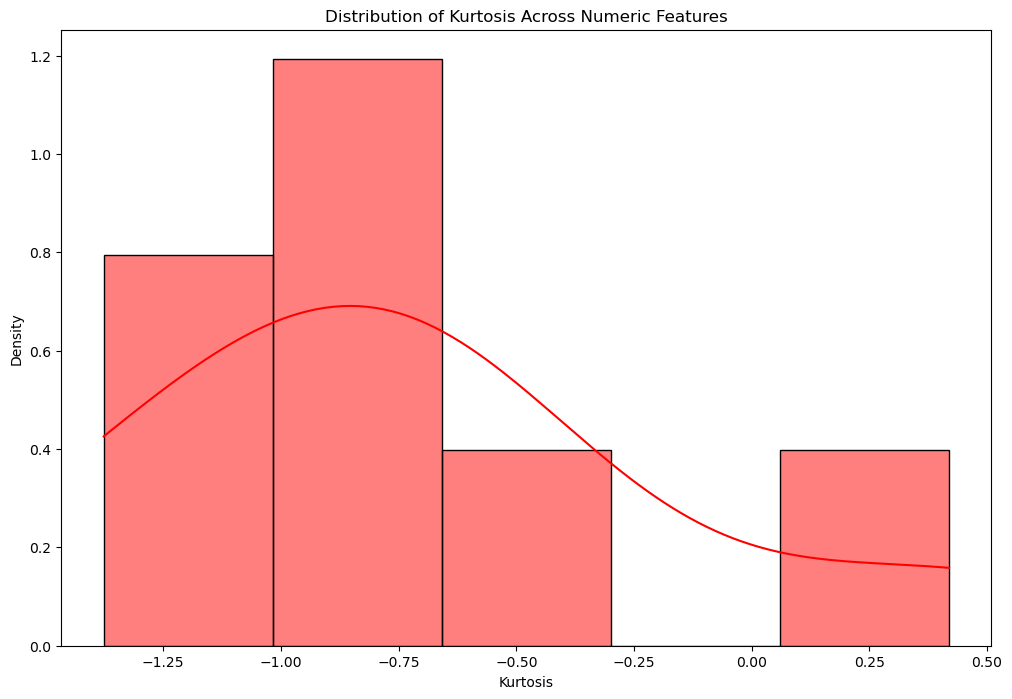

In [41]:
plt.figure(figsize=(12,8))
# compute kurtosis only for numeric columns to avoid attempting to convert strings to floats
kurt_vals = numeric_features.kurt().dropna()
sns.histplot(kurt_vals, color='r', kde=True, stat='density')
plt.xlabel('Kurtosis')
plt.title('Distribution of Kurtosis Across Numeric Features')
plt.show()

In [42]:
correlation = numeric_features.corr()
print(correlation['cylinders'].sort_values(ascending = False),'\n')

cylinders       1.000000
displacement    0.950721
weight          0.896017
model year     -0.348746
acceleration   -0.505419
origin         -0.562543
mpg            -0.775396
Name: cylinders, dtype: float64 



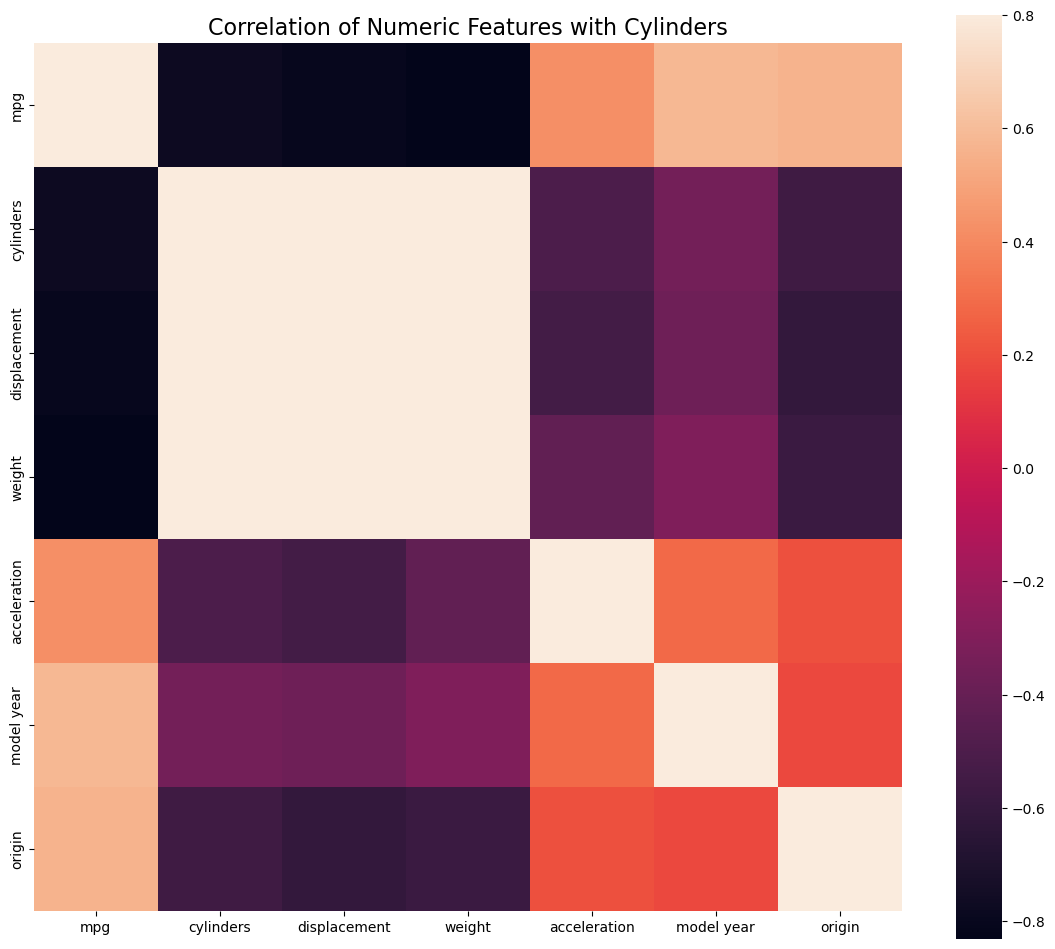

In [43]:
f , ax = plt.subplots(figsize = (14,12))

plt.title('Correlation of Numeric Features with Cylinders',y=1,size=16)

sns.heatmap(correlation,square = True,  vmax=0.8)
plt.show()

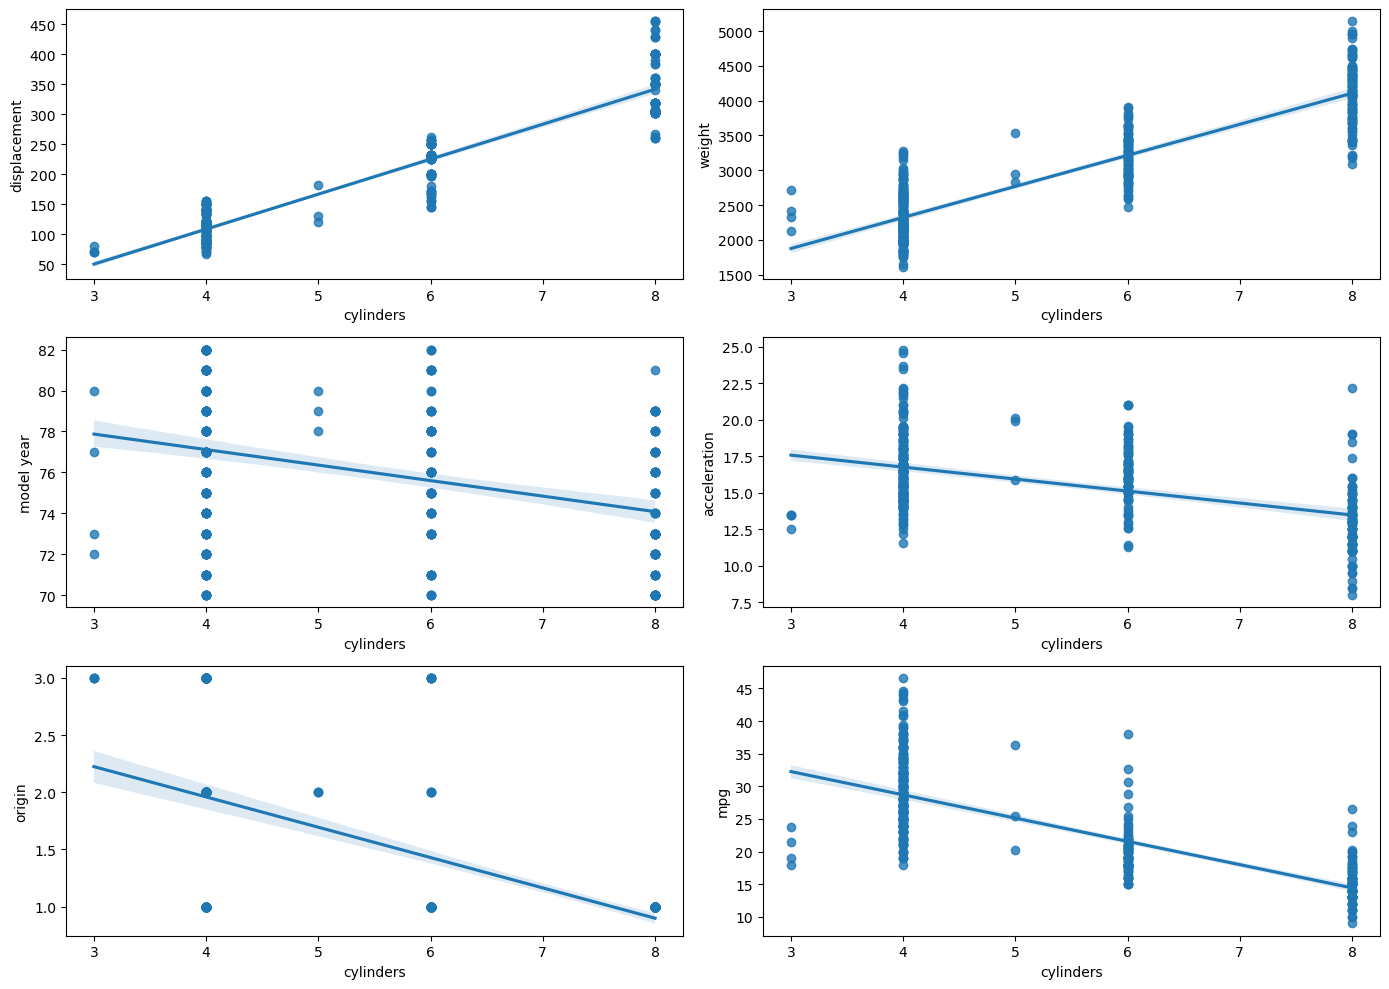

In [44]:
# Create subplots
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))

# 1. displacement vs cylinders
sns.regplot(x='cylinders', y='displacement', data=auto_mpg, scatter=True, fit_reg=True, ax=ax1)

# 2. weight vs cylinders
sns.regplot(x='cylinders', y='weight', data=auto_mpg, scatter=True, fit_reg=True, ax=ax2)

# 3. model year vs cylinders
sns.regplot(x='cylinders', y='model year', data=auto_mpg, scatter=True, fit_reg=True, ax=ax3)

# 4. acceleration vs cylinders
sns.regplot(x='cylinders', y='acceleration', data=auto_mpg, scatter=True, fit_reg=True, ax=ax4)

# 5. origin vs cylinders
sns.regplot(x='cylinders', y='origin', data=auto_mpg, scatter=True, fit_reg=True, ax=ax5)

# 6. mpg vs cylinders
sns.regplot(x='cylinders', y='mpg', data=auto_mpg, scatter=True, fit_reg=True, ax=ax6)

plt.tight_layout()
plt.show()
